# Comparision Between the two main Metropolises, Shanghai and Beijing. 

# 1. Let's analyze Shanghai first.

In [1]:
import pandas as pd
Shanghai_df = pd.read_csv('Shanghai_Location.csv')
Shanghai_df.head()

,Postal Code,City,District,Longitude,Latitude
0,310100,Shanghai,Shanghai,121.487899,31.249162
1,310101,Shanghai,Huangpu,121.496072,31.227203
2,310104,Shanghai,Xuhui,121.446235,31.169152
3,310105,Shanghai,Changning,121.387616,31.213301
4,310106,Shanghai,Jingan,121.454756,31.235381


In [2]:
Shanghai_df.shape

(13, 5)

## STEP 1. Explore location of Shanghai, China

#### Let's explore location of downtown Shanghai, which is the first row in our dataframe.

In [3]:
# Get the neighborhood's latitude and longitude values.

latitude = Shanghai_df.loc[0, 'Latitude'] # Shanghai latitude value
longitude = Shanghai_df.loc[0, 'Longitude'] # Shanghai longitude value

district_name = Shanghai_df.loc[0, 'District'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(district_name, 
                                                               latitude, 
                                                               longitude))

Latitude and longitude values of Shanghai are 31.249162, 121.487899.


In [4]:
# Location of downtown Shanghai
latitude = 31.249162
longitude = 121.487899

In [5]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

Solving environment: | 
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_2
  - defaults/osx-64::openssl-1.1.1d-h1de35ccdone

# All requested packages already installed.



In [6]:
# create map of Shanghai using latitude and longitude values
map_shanghai = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, district in zip(Shanghai_df['Latitude'], Shanghai_df['Longitude'], Shanghai_df['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_shanghai)  
    
map_shanghai

## STEP 2. Explore Neighborhoods in Downtown Shanghai

#### Define Foursquare Credentials and Version

In [7]:
CLIENT_ID = 'LSDMTKZ05ASUC4KBVXZWYLENV1TDP4DERWQPLP5AXB3W2YEH' # your Foursquare ID
CLIENT_SECRET = '5SLKOAU3MCFQVJTWYPMJGKVPCWC5VUZ1QOICSWIFMIDVYQQ2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 50000 # define radius

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LSDMTKZ05ASUC4KBVXZWYLENV1TDP4DERWQPLP5AXB3W2YEH
CLIENT_SECRET:5SLKOAU3MCFQVJTWYPMJGKVPCWC5VUZ1QOICSWIFMIDVYQQ2


#### Let's create a function to get venus to to all the distrcts in Shanghai.

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each district and create a new dataframe called Shanghai_venues.

In [9]:
import requests # library to handle requests

In [10]:
Shanghai_venues = getNearbyVenues(names=Shanghai_df['District'],
                                   latitudes=Shanghai_df['Latitude'],
                                   longitudes=Shanghai_df['Longitude']
                                  )

Shanghai
Huangpu
Xuhui
Changning
Jingan
Putuo
Zhabei
Hongkou
Yangpu
Minhang
Jiading
Songjiang
Nanhui


#### Let's check the size of the resulting dataframe

In [11]:
print(Shanghai_venues.shape)
Shanghai_venues.head()

(115, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Shanghai,31.249162,121.487899,Bund Club,31.247147,121.488660,Lounge
1,Shanghai,31.249162,121.487899,Hyatt on the Bund Shanghai,31.247206,121.488571,Hotel
2,Shanghai,31.249162,121.487899,Xindalu (新大陆),31.247296,121.488764,Shanghai Restaurant
3,Shanghai,31.249162,121.487899,Vue Bar,31.246909,121.488319,Hotel Bar
4,Shanghai,31.249162,121.487899,Gym,31.247186,121.488609,Gym


Let's check how many venues were returned for each neighborhood

In [12]:
Shanghai_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Changning,20,20,20,20,20,20
Hongkou,6,6,6,6,6,6
Huangpu,14,14,14,14,14,14
Jiading,4,4,4,4,4,4
Jingan,26,26,26,26,26,26
Minhang,1,1,1,1,1,1
Nanhui,1,1,1,1,1,1
Putuo,4,4,4,4,4,4
Shanghai,23,23,23,23,23,23


#### Let's find out how many unique categories can be curated from all the returned venues

In [13]:
print('There are {} uniques categories.'.format(len(Shanghai_venues['Venue Category'].unique())))

There are 61 uniques categories.


## STEP 3. Analyze Each Neighborhood

In [14]:
Shanghai_venues.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Shanghai,31.249162,121.487899,Bund Club,31.247147,121.488660,Lounge
1,Shanghai,31.249162,121.487899,Hyatt on the Bund Shanghai,31.247206,121.488571,Hotel
2,Shanghai,31.249162,121.487899,Xindalu (新大陆),31.247296,121.488764,Shanghai Restaurant
3,Shanghai,31.249162,121.487899,Vue Bar,31.246909,121.488319,Hotel Bar
4,Shanghai,31.249162,121.487899,Gym,31.247186,121.488609,Gym


In [15]:
Shanghai_venues.shape

(115, 7)

In [16]:
# one hot encoding
Shanghai_onehot = pd.get_dummies(Shanghai_venues[['Venue Category']], prefix="", prefix_sep="")
Shanghai_onehot.shape

(115, 61)

In [17]:
Shanghai_onehot.head()

,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Bakery,Bistro,Breakfast Spot,Burger Joint,Bus Station,Business Center,...,Spa,Sporting Goods Shop,Steakhouse,Sushi Restaurant,Tea Room,Theater,Toll Booth,Train Station,Vegetarian / Vegan Restaurant,Wedding Hall
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# add district column back to dataframe
Shanghai_onehot['District'] = Shanghai_venues['District']
Shanghai_onehot.shape

(115, 62)

In [19]:
Shanghai_onehot.head()

,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Bakery,Bistro,Breakfast Spot,Burger Joint,Bus Station,Business Center,...,Sporting Goods Shop,Steakhouse,Sushi Restaurant,Tea Room,Theater,Toll Booth,Train Station,Vegetarian / Vegan Restaurant,Wedding Hall,District
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Shanghai
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Shanghai
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Shanghai
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Shanghai
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Shanghai


In [20]:
# move neighborhood column to the first column
fixed_columns = [Shanghai_onehot.columns[-1]] + list(Shanghai_onehot.columns[:-1])
Shanghai_onehot = Shanghai_onehot[fixed_columns]

print("The dimensionality of Shanghai_onehot dataset is", Shanghai_onehot.shape)
Shanghai_onehot.head()

The dimensionality of Shanghai_onehot dataset is (115, 62)


,District,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Bakery,Bistro,Breakfast Spot,Burger Joint,Bus Station,...,Spa,Sporting Goods Shop,Steakhouse,Sushi Restaurant,Tea Room,Theater,Toll Booth,Train Station,Vegetarian / Vegan Restaurant,Wedding Hall
0,Shanghai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Shanghai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Shanghai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Shanghai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Shanghai,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by District and by taking the mean of the frequency of occurrence of each category

In [21]:
Shanghai_grouped = Shanghai_onehot.groupby('District').mean().reset_index()
Shanghai_grouped

,District,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Bakery,Bistro,Breakfast Spot,Burger Joint,Bus Station,...,Spa,Sporting Goods Shop,Steakhouse,Sushi Restaurant,Tea Room,Theater,Toll Booth,Train Station,Vegetarian / Vegan Restaurant,Wedding Hall
0,Changning,0.000000,0.05,0.00,0.05,0.000000,0.000000,0.000000,0.05,0.00,...,0.00,0.000000,0.000000,0.000000,0.05,0.000000,0.0,0.00,0.000000,0.000000
1,Hongkou,0.000000,0.00,0.00,0.00,0.166667,0.000000,0.000000,0.00,0.00,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
2,Huangpu,0.071429,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,...,0.00,0.000000,0.071429,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
3,Jiading,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,...,0.25,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
4,Jingan,0.000000,0.00,0.00,0.00,0.000000,0.038462,0.000000,0.00,0.00,...,0.00,0.038462,0.000000,0.000000,0.00,0.038462,0.0,0.00,0.038462,0.000000
5,Minhang,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
6,Nanhui,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
7,Putuo,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.25,0.000000,0.000000
8,Shanghai,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.043478,0.00,0.00,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
9,Songjiang,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.00,...,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.5,0.00,0.000000,0.000000


#### Let's confirm the new size

In [22]:
Shanghai_grouped.shape

(13, 62)

#### Let's print each district along with the top 5 most common venues

In [23]:
num_top_venues = 5

for hood in Shanghai_grouped['District']:
    print("----"+hood+"----")
    temp = Shanghai_grouped[Shanghai_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Changning----
                 venue  freq
0   Chinese Restaurant  0.20
1                Hotel  0.10
2  Japanese Restaurant  0.10
3       Farmers Market  0.05
4    Electronics Store  0.05


----Hongkou----
               venue  freq
0               Café  0.17
1   Ramen Restaurant  0.17
2  Convenience Store  0.17
3             Bakery  0.17
4               Pool  0.17


----Huangpu----
            venue  freq
0           Hotel  0.14
1  Clothing Store  0.14
2     Art Gallery  0.07
3            Café  0.07
4      Steakhouse  0.07


----Jiading----
                 venue  freq
0         Noodle House  0.25
1                  Spa  0.25
2   Chinese Restaurant  0.25
3  Dumpling Restaurant  0.25
4          Art Gallery  0.00


----Jingan----
                venue  freq
0         Coffee Shop  0.12
1   Convenience Store  0.08
2               Hotel  0.08
3  Chinese Restaurant  0.08
4           Hotel Bar  0.04


----Minhang----
                                      venue  freq
0  Residential Buildi

#### Let's put that into a pandas dataframe
First, let's write a function to sort the venues in descending order.

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [25]:
import numpy as np # library to handle data in a vectorized manner

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_venues_sorted = pd.DataFrame(columns=columns)
District_venues_sorted['District'] = Shanghai_grouped['District']

for ind in np.arange(Shanghai_grouped.shape[0]):
    District_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Shanghai_grouped.iloc[ind, :], num_top_venues)

District_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Changning,Chinese Restaurant,Hotel,Japanese Restaurant,Dongbei Restaurant,Gym Pool,Art Museum,Athletics & Sports,Tea Room,Grocery Store,Convenience Store
1,Hongkou,Ramen Restaurant,Bakery,Chinese Restaurant,Café,Convenience Store,Pool,Furniture / Home Store,French Restaurant,Grocery Store,Farmers Market
2,Huangpu,Clothing Store,Hotel,Hotel Bar,Shanghai Restaurant,Business Center,Café,Coffee Shop,Furniture / Home Store,New American Restaurant,Scenic Lookout
3,Jiading,Spa,Dumpling Restaurant,Chinese Restaurant,Noodle House,Wedding Hall,Convenience Store,Gym / Fitness Center,Gym,Grocery Store,Furniture / Home Store
4,Jingan,Coffee Shop,Chinese Restaurant,Hotel,Convenience Store,French Restaurant,Fast Food Restaurant,History Museum,Vegetarian / Vegan Restaurant,Hotpot Restaurant,Italian Restaurant


#### Above is each district along with the top 10 most common venues

## STEP 4. Cluster Neighborhoods
Run k-means to cluster the neighborhood into 5 clusters.

In [26]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

## Clustering Evaluation
We first compute SSE for different values of k = {2,3,4,5,6,7}

In [27]:
import numpy as np
random_state = 10

In [28]:
Shanghai_grouped_clustering = Shanghai_grouped.drop('District', 1)

In [29]:
score = np.zeros(10);
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=random_state); #Initializing KMeans for different n_clusters
    kmeans.fit_predict(Shanghai_grouped_clustering)  #Clustering using KMeans
    score[i] = -kmeans.score(Shanghai_grouped_clustering)  #Computing SSE
    print("SSE for k=",i,":", round(score[i],2)) #Printing SSE

SSE for k= 2 : 2.6
SSE for k= 3 : 1.82
SSE for k= 4 : 1.34
SSE for k= 5 : 0.97
SSE for k= 6 : 0.81
SSE for k= 7 : 0.61
SSE for k= 8 : 0.44
SSE for k= 9 : 0.3


Plotting SSE for different values of k.

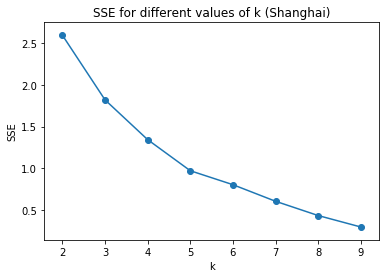

In [31]:
import matplotlib.pyplot as plt
plt.plot(range(2,10),score[2:10])
plt.scatter(range(2,10),score[2:10])
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE for different values of k (Shanghai)')
plt.show()

### Let's tantatively choose K = 5 to do the following K-Means clustering for Shanghai.

### Because K = 5 is an obvious elbow and it is reasonalbe to have 5 clusters. 

In [32]:
# set number of clusters
kclusters = 5
Shanghai_grouped_clustering = Shanghai_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Shanghai_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 4, 1, 1, 3, 2, 4, 4, 0, 1, 1, 4], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [33]:
# add clustering labels
District_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Shanghai_merged = Shanghai_df

# merge Shanghai_grouped with Shanghai_data (df) to add latitude/longitude for each neighborhood
Shanghai_merged = Shanghai_merged.join(District_venues_sorted.set_index('District'), on='District')

print(Shanghai_merged.shape)
Shanghai_merged.head() # check the last columns!

(13, 16)


,Postal Code,City,District,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,310100,Shanghai,Shanghai,121.487899,31.249162,4,Hotel,Hotel Bar,Restaurant,Convenience Store,Coffee Shop,Gym,Breakfast Spot,Shanghai Restaurant,Hotel Pool,Café
1,310101,Shanghai,Huangpu,121.496072,31.227203,4,Clothing Store,Hotel,Hotel Bar,Shanghai Restaurant,Business Center,Café,Coffee Shop,Furniture / Home Store,New American Restaurant,Scenic Lookout
2,310104,Shanghai,Xuhui,121.446235,31.169152,1,Wedding Hall,Sushi Restaurant,Chinese Restaurant,Café,Comedy Club,Gym / Fitness Center,Grocery Store,Gym,Furniture / Home Store,Dim Sum Restaurant
3,310105,Shanghai,Changning,121.387616,31.213301,1,Chinese Restaurant,Hotel,Japanese Restaurant,Dongbei Restaurant,Gym Pool,Art Museum,Athletics & Sports,Tea Room,Grocery Store,Convenience Store
4,310106,Shanghai,Jingan,121.454756,31.235381,1,Coffee Shop,Chinese Restaurant,Hotel,Convenience Store,French Restaurant,Fast Food Restaurant,History Museum,Vegetarian / Vegan Restaurant,Hotpot Restaurant,Italian Restaurant


Finally, let's visualize the resulting clusters

In [34]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [35]:
# create map
Shanghai_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Shanghai_merged['Latitude'], Shanghai_merged['Longitude'], Shanghai_merged['District'], Shanghai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Shanghai_map_clusters)
       
Shanghai_map_clusters

## STEP 5. Examine Clusters
Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. 

In [36]:
Shanghai_merged.head()

,Postal Code,City,District,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,310100,Shanghai,Shanghai,121.487899,31.249162,4,Hotel,Hotel Bar,Restaurant,Convenience Store,Coffee Shop,Gym,Breakfast Spot,Shanghai Restaurant,Hotel Pool,Café
1,310101,Shanghai,Huangpu,121.496072,31.227203,4,Clothing Store,Hotel,Hotel Bar,Shanghai Restaurant,Business Center,Café,Coffee Shop,Furniture / Home Store,New American Restaurant,Scenic Lookout
2,310104,Shanghai,Xuhui,121.446235,31.169152,1,Wedding Hall,Sushi Restaurant,Chinese Restaurant,Café,Comedy Club,Gym / Fitness Center,Grocery Store,Gym,Furniture / Home Store,Dim Sum Restaurant
3,310105,Shanghai,Changning,121.387616,31.213301,1,Chinese Restaurant,Hotel,Japanese Restaurant,Dongbei Restaurant,Gym Pool,Art Museum,Athletics & Sports,Tea Room,Grocery Store,Convenience Store
4,310106,Shanghai,Jingan,121.454756,31.235381,1,Coffee Shop,Chinese Restaurant,Hotel,Convenience Store,French Restaurant,Fast Food Restaurant,History Museum,Vegetarian / Vegan Restaurant,Hotpot Restaurant,Italian Restaurant


In [37]:
# Cluster 1
Shanghai_merged.loc[Shanghai_merged['Cluster Labels'] == 0, Shanghai_merged.columns[[1] + [2] + list(range(5, Shanghai_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Shanghai,Songjiang,0,Toll Booth,Metro Station,Wedding Hall,Comedy Club,Gym / Fitness Center,Gym,Grocery Store,Furniture / Home Store,French Restaurant,Fast Food Restaurant


In [38]:
# Cluster 2
Shanghai_merged.loc[Shanghai_merged['Cluster Labels'] == 1, Shanghai_merged.columns[[1] + [2] + list(range(5, Shanghai_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Shanghai,Xuhui,1,Wedding Hall,Sushi Restaurant,Chinese Restaurant,Café,Comedy Club,Gym / Fitness Center,Grocery Store,Gym,Furniture / Home Store,Dim Sum Restaurant
3,Shanghai,Changning,1,Chinese Restaurant,Hotel,Japanese Restaurant,Dongbei Restaurant,Gym Pool,Art Museum,Athletics & Sports,Tea Room,Grocery Store,Convenience Store
4,Shanghai,Jingan,1,Coffee Shop,Chinese Restaurant,Hotel,Convenience Store,French Restaurant,Fast Food Restaurant,History Museum,Vegetarian / Vegan Restaurant,Hotpot Restaurant,Italian Restaurant
7,Shanghai,Hongkou,1,Ramen Restaurant,Bakery,Chinese Restaurant,Café,Convenience Store,Pool,Furniture / Home Store,French Restaurant,Grocery Store,Farmers Market
8,Shanghai,Yangpu,1,Convenience Store,Fast Food Restaurant,Bus Station,Chinese Restaurant,Wedding Hall,Gym Pool,Gym / Fitness Center,Gym,Grocery Store,Furniture / Home Store
10,Shanghai,Jiading,1,Spa,Dumpling Restaurant,Chinese Restaurant,Noodle House,Wedding Hall,Convenience Store,Gym / Fitness Center,Gym,Grocery Store,Furniture / Home Store


In [39]:
# Cluster 3
Shanghai_merged.loc[Shanghai_merged['Cluster Labels'] == 2, Shanghai_merged.columns[[1] + [2] + list(range(5, Shanghai_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Shanghai,Nanhui,2,Chinese Restaurant,Wedding Hall,Convenience Store,Gym Pool,Gym / Fitness Center,Gym,Grocery Store,Furniture / Home Store,French Restaurant,Fast Food Restaurant


In [40]:
# Cluster 4
Shanghai_merged.loc[Shanghai_merged['Cluster Labels'] == 3, Shanghai_merged.columns[[1] + [2] + list(range(5, Shanghai_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Shanghai,Minhang,3,Residential Building (Apartment / Condo),Wedding Hall,Comedy Club,Gym Pool,Gym / Fitness Center,Gym,Grocery Store,Furniture / Home Store,French Restaurant,Fast Food Restaurant


In [41]:
# Cluster 5
Shanghai_merged.loc[Shanghai_merged['Cluster Labels'] == 4, Shanghai_merged.columns[[1] + [2] + list(range(5, Shanghai_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Shanghai,Shanghai,4,Hotel,Hotel Bar,Restaurant,Convenience Store,Coffee Shop,Gym,Breakfast Spot,Shanghai Restaurant,Hotel Pool,Café
1,Shanghai,Huangpu,4,Clothing Store,Hotel,Hotel Bar,Shanghai Restaurant,Business Center,Café,Coffee Shop,Furniture / Home Store,New American Restaurant,Scenic Lookout
5,Shanghai,Putuo,4,Hotel,Train Station,Metro Station,Convenience Store,Gym Pool,Gym / Fitness Center,Gym,Grocery Store,Furniture / Home Store,French Restaurant
6,Shanghai,Zhabei,4,Hotel,Massage Studio,Asian Restaurant,Seafood Restaurant,Dongbei Restaurant,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,French Restaurant


# 2. Now, let's turn to analyze Beijing.

In [42]:
Beijing_df = pd.read_csv('Beijing_Location.csv')
Beijing_df.head()

,Postal Code,City,District,Longitude,Latitude
0,110100,Beijing,Beijing,116.395645,39.929986
1,110101,Beijing,Dongcheng,116.421885,39.938574
2,110102,Beijing,Xicheng,116.373190,39.934280
3,110103,Beijing,Chongwen,116.424636,39.889292
4,110104,Beijing,Xuanwu,116.369352,39.891531


In [43]:
Beijing_df.shape

(8, 5)

## STEP 1. Explore location of Beijing, China
#### Let's explore location of downtown Beijing, which is the first row in our dataframe.

In [44]:
# Get the neighborhood's latitude and longitude values.

latitude = Beijing_df.loc[0, 'Latitude'] # Beijing latitude value
longitude = Beijing_df.loc[0, 'Longitude'] # Beijing longitude value

district_name = Beijing_df.loc[0, 'District'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(district_name, 
                                                               latitude, 
                                                               longitude))

Latitude and longitude values of Beijing are 39.929986, 116.395645.


In [45]:
# Location of downtown Beijing
latitude = 39.929986
longitude = 116.395645

In [46]:
# create map of Beijng using latitude and longitude values
map_Beijing = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, district in zip(Beijing_df['Latitude'], Beijing_df['Longitude'], Beijing_df['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Beijing)  
    
map_Beijing

## STEP 2. Explore Neighborhoods in Downtown
#### Define Foursquare Credentials and Version Beijing

In [47]:
CLIENT_ID = 'LSDMTKZ05ASUC4KBVXZWYLENV1TDP4DERWQPLP5AXB3W2YEH' # your Foursquare ID
CLIENT_SECRET = '5SLKOAU3MCFQVJTWYPMJGKVPCWC5VUZ1QOICSWIFMIDVYQQ2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 50000 # define radius

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LSDMTKZ05ASUC4KBVXZWYLENV1TDP4DERWQPLP5AXB3W2YEH
CLIENT_SECRET:5SLKOAU3MCFQVJTWYPMJGKVPCWC5VUZ1QOICSWIFMIDVYQQ2


In [49]:
Beijing_venues = getNearbyVenues(names=Beijing_df['District'],
                                   latitudes=Beijing_df['Latitude'],
                                   longitudes=Beijing_df['Longitude']
                                  )

Beijing
Dongcheng
Xicheng
Chongwen
Xuanwu
Chaoyang
Haidian
Changping


#### Let's check the size of the resulting dataframe

In [50]:
print(Beijing_venues.shape)
Beijing_venues.head()

(70, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beijing,39.929986,116.395645,TRB Hutong,39.926528,116.397204,French Restaurant
1,Beijing,39.929986,116.395645,The Georg by Georg Jensen,39.933440,116.392740,Scandinavian Restaurant
2,Beijing,39.929986,116.395645,City Walls Courtyard House Beijing,39.928131,116.392442,Hostel
3,Beijing,39.929986,116.395645,Peking Hostel (北平国际青年旅舍),39.934350,116.396886,Hostel
4,Beijing,39.929986,116.395645,Nanluogu Alley (南锣鼓巷),39.932498,116.396925,Pedestrian Plaza


Let's check how many venues were returned for each neighborhood

In [51]:
Beijing_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Beijing,17,17,17,17,17,17
Changping,5,5,5,5,5,5
Chaoyang,2,2,2,2,2,2
Chongwen,5,5,5,5,5,5
Dongcheng,24,24,24,24,24,24
Haidian,1,1,1,1,1,1
Xicheng,9,9,9,9,9,9
Xuanwu,7,7,7,7,7,7


#### Let's find out how many unique categories can be curated from all the returned venues

In [52]:
print('There are {} uniques categories.'.format(len(Beijing_venues['Venue Category'].unique())))

There are 38 uniques categories.


## STEP 3. Analyze Each Neighborhood

In [53]:
Beijing_venues.head()

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beijing,39.929986,116.395645,TRB Hutong,39.926528,116.397204,French Restaurant
1,Beijing,39.929986,116.395645,The Georg by Georg Jensen,39.933440,116.392740,Scandinavian Restaurant
2,Beijing,39.929986,116.395645,City Walls Courtyard House Beijing,39.928131,116.392442,Hostel
3,Beijing,39.929986,116.395645,Peking Hostel (北平国际青年旅舍),39.934350,116.396886,Hostel
4,Beijing,39.929986,116.395645,Nanluogu Alley (南锣鼓巷),39.932498,116.396925,Pedestrian Plaza


In [54]:
Beijing_venues.shape

(70, 7)

In [55]:
# one hot encoding
Beijing_onehot = pd.get_dummies(Beijing_venues[['Venue Category']], prefix="", prefix_sep="")
Beijing_onehot.shape

(70, 38)

In [56]:
Beijing_onehot.head()

,Asian Restaurant,Auto Garage,Bakery,Bar,Beer Bar,Beijing Restaurant,Bus Station,Café,Cantonese Restaurant,Chinese Restaurant,...,Park,Pedestrian Plaza,Pizza Place,Restaurant,Russian Restaurant,Sandwich Place,Scandinavian Restaurant,Shopping Mall,Supermarket,Vegetarian / Vegan Restaurant
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [57]:
# add district column back to dataframe
Beijing_onehot['District'] = Beijing_venues['District']
Beijing_onehot.shape

(70, 39)

In [58]:
Beijing_onehot.head()

,Asian Restaurant,Auto Garage,Bakery,Bar,Beer Bar,Beijing Restaurant,Bus Station,Café,Cantonese Restaurant,Chinese Restaurant,...,Pedestrian Plaza,Pizza Place,Restaurant,Russian Restaurant,Sandwich Place,Scandinavian Restaurant,Shopping Mall,Supermarket,Vegetarian / Vegan Restaurant,District
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Beijing
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Beijing
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Beijing
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Beijing
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Beijing


In [59]:
# move neighborhood column to the first column
fixed_columns = [Beijing_onehot.columns[-1]] + list(Beijing_onehot.columns[:-1])
Beijing_onehot = Beijing_onehot[fixed_columns]

print("The dimensionality of Beijing_onehot dataset is", Beijing_onehot.shape)
Beijing_onehot.head()

The dimensionality of Beijing_onehot dataset is (70, 39)


,District,Asian Restaurant,Auto Garage,Bakery,Bar,Beer Bar,Beijing Restaurant,Bus Station,Café,Cantonese Restaurant,...,Park,Pedestrian Plaza,Pizza Place,Restaurant,Russian Restaurant,Sandwich Place,Scandinavian Restaurant,Shopping Mall,Supermarket,Vegetarian / Vegan Restaurant
0,Beijing,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Beijing,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Beijing,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Beijing,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Beijing,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### Next, let's group rows by District and by taking the mean of the frequency of occurrence of each category

In [60]:
Beijing_grouped = Beijing_onehot.groupby('District').mean().reset_index()
Beijing_grouped

,District,Asian Restaurant,Auto Garage,Bakery,Bar,Beer Bar,Beijing Restaurant,Bus Station,Café,Cantonese Restaurant,...,Park,Pedestrian Plaza,Pizza Place,Restaurant,Russian Restaurant,Sandwich Place,Scandinavian Restaurant,Shopping Mall,Supermarket,Vegetarian / Vegan Restaurant
0,Beijing,0.0,0.0,0.0,0.058824,0.000000,0.058824,0.058824,0.058824,0.000000,...,0.0,0.058824,0.000000,0.058824,0.000,0.000000,0.058824,0.000000,0.0,0.000000
1,Changping,0.2,0.0,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.200000,0.0,0.000000
2,Chaoyang,0.0,0.5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.5,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000
3,Chongwen,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.2,0.000000
4,Dongcheng,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.041667,...,0.0,0.000000,0.041667,0.000000,0.125,0.041667,0.000000,0.041667,0.0,0.083333
5,Haidian,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000
6,Xicheng,0.0,0.0,0.0,0.000000,0.111111,0.111111,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.0,0.000000
7,Xuanwu,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000,0.142857,0.000000,0.142857,0.0,0.000000


#### Let's confirm the new size

In [61]:
Beijing_grouped.shape

(8, 39)

#### Let's print each district along with the top 5 most common venues

In [62]:
num_top_venues = 5

for hood in Beijing_grouped['District']:
    print("----"+hood+"----")
    temp = Beijing_grouped[Beijing_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beijing----
               venue  freq
0              Hotel  0.12
1  Hotpot Restaurant  0.12
2      Metro Station  0.12
3             Hostel  0.12
4  French Restaurant  0.06


----Changping----
                venue  freq
0    Asian Restaurant   0.2
1              Bakery   0.2
2   Korean Restaurant   0.2
3       Shopping Mall   0.2
4  Chinese Restaurant   0.2


----Chaoyang----
                 venue  freq
0                 Park   0.5
1          Auto Garage   0.5
2     Asian Restaurant   0.0
3  Japanese Restaurant   0.0
4    Korean Restaurant   0.0


----Chongwen----
                  venue  freq
0           Supermarket   0.2
1         Metro Station   0.2
2  Fast Food Restaurant   0.2
3    Chinese Restaurant   0.2
4     Convenience Store   0.2


----Dongcheng----
                 venue  freq
0   Russian Restaurant  0.12
1          Coffee Shop  0.12
2                Hotel  0.08
3   Chinese Restaurant  0.08
4  Japanese Restaurant  0.08


----Haidian----
                venue  freq
0 

#### Let's put that into a pandas dataframe
We previously wrote a function to sort the venues in descending order.
Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [63]:
import numpy as np # library to handle data in a vectorized manner

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_venues_sorted = pd.DataFrame(columns=columns)
District_venues_sorted['District'] = Beijing_grouped['District']

for ind in np.arange(Beijing_grouped.shape[0]):
    District_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Beijing_grouped.iloc[ind, :], num_top_venues)

District_venues_sorted.head()

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beijing,Hostel,Hotel,Hotpot Restaurant,Metro Station,Pedestrian Plaza,Chinese Restaurant,Bus Station,Beijing Restaurant,Café,Restaurant
1,Changping,Asian Restaurant,Chinese Restaurant,Shopping Mall,Bakery,Korean Restaurant,Fast Food Restaurant,Dessert Shop,Department Store,Convenience Store,Coffee Shop
2,Chaoyang,Park,Auto Garage,Cantonese Restaurant,Fast Food Restaurant,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Cocktail Bar,Chinese Restaurant
3,Chongwen,Chinese Restaurant,Convenience Store,Fast Food Restaurant,Metro Station,Supermarket,Beer Bar,Beijing Restaurant,Bus Station,Café,Cantonese Restaurant
4,Dongcheng,Coffee Shop,Russian Restaurant,Vegetarian / Vegan Restaurant,Hotel,Japanese Restaurant,Chinese Restaurant,Cantonese Restaurant,Fast Food Restaurant,Grocery Store,Cocktail Bar


#### Above is each district along with the top 10 most common venues

## STEP 4. Cluster Neighborhoods
Run k-means to cluster the neighborhood into 3 clusters.

## Clustering Evaluation
We first compute SSE for different values of k = {2,3,4,5,6,7}

In [64]:
Beijing_grouped_clustering = Beijing_grouped.drop('District', 1)

In [65]:
score = np.zeros(8);
for i in range(2,8):
    kmeans = KMeans(n_clusters=i, random_state=random_state); #Initializing KMeans for different n_clusters
    kmeans.fit_predict(Beijing_grouped_clustering)  #Clustering using KMeans
    score[i] = -kmeans.score(Beijing_grouped_clustering)  #Computing SSE
    print("SSE for k=",i,":", round(score[i],2)) #Printing SSE

SSE for k= 2 : 1.06
SSE for k= 3 : 0.59
SSE for k= 4 : 0.41
SSE for k= 5 : 0.25
SSE for k= 6 : 0.14
SSE for k= 7 : 0.06


Plotting SSE for different values of k.

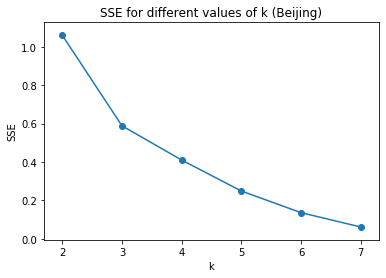

In [66]:
import matplotlib.pyplot as plt
plt.plot(range(2,8),score[2:8])
plt.scatter(range(2,8),score[2:8])
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE for different values of k (Beijing)')
plt.show()

### I decided to choose K = 3 or 4, because K = 3 is an elbow. 
### But finally I decided to have K equal to 4 because it is more reasonalbe based on real situation.

In [67]:
# set number of clusters
kclusters = 4
Beijing_grouped_clustering = Beijing_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Beijing_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([0, 3, 2, 0, 0, 1, 0, 0], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [68]:
# add clustering labels
District_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Beijing_merged = Beijing_df

# merge Beijing_grouped with Beijing_data (df) to add latitude/longitude for each neighborhood
Beijing_merged = Beijing_merged.join(District_venues_sorted.set_index('District'), on='District')

print(Beijing_merged.shape)
Beijing_merged.head() # check the last columns!

(8, 16)


,Postal Code,City,District,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,110100,Beijing,Beijing,116.395645,39.929986,0,Hostel,Hotel,Hotpot Restaurant,Metro Station,Pedestrian Plaza,Chinese Restaurant,Bus Station,Beijing Restaurant,Café,Restaurant
1,110101,Beijing,Dongcheng,116.421885,39.938574,0,Coffee Shop,Russian Restaurant,Vegetarian / Vegan Restaurant,Hotel,Japanese Restaurant,Chinese Restaurant,Cantonese Restaurant,Fast Food Restaurant,Grocery Store,Cocktail Bar
2,110102,Beijing,Xicheng,116.373190,39.934280,0,Hotel,Noodle House,Museum,Department Store,Beer Bar,Beijing Restaurant,Mexican Restaurant,Dessert Shop,Convenience Store,Coffee Shop
3,110103,Beijing,Chongwen,116.424636,39.889292,0,Chinese Restaurant,Convenience Store,Fast Food Restaurant,Metro Station,Supermarket,Beer Bar,Beijing Restaurant,Bus Station,Café,Cantonese Restaurant
4,110104,Beijing,Xuanwu,116.369352,39.891531,0,Fast Food Restaurant,Shopping Mall,Sandwich Place,Hotel,Department Store,Coffee Shop,Metro Station,Chinese Restaurant,Dessert Shop,Convenience Store


Finally, let's visualize the resulting clusters

In [69]:
# create map
Beijing_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Beijing_merged['Latitude'], Beijing_merged['Longitude'], Beijing_merged['District'], Beijing_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(Beijing_map_clusters)
       
Beijing_map_clusters

## STEP 5. Examine Clusters
Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. 

In [70]:
Beijing_merged.head()

,Postal Code,City,District,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,110100,Beijing,Beijing,116.395645,39.929986,0,Hostel,Hotel,Hotpot Restaurant,Metro Station,Pedestrian Plaza,Chinese Restaurant,Bus Station,Beijing Restaurant,Café,Restaurant
1,110101,Beijing,Dongcheng,116.421885,39.938574,0,Coffee Shop,Russian Restaurant,Vegetarian / Vegan Restaurant,Hotel,Japanese Restaurant,Chinese Restaurant,Cantonese Restaurant,Fast Food Restaurant,Grocery Store,Cocktail Bar
2,110102,Beijing,Xicheng,116.373190,39.934280,0,Hotel,Noodle House,Museum,Department Store,Beer Bar,Beijing Restaurant,Mexican Restaurant,Dessert Shop,Convenience Store,Coffee Shop
3,110103,Beijing,Chongwen,116.424636,39.889292,0,Chinese Restaurant,Convenience Store,Fast Food Restaurant,Metro Station,Supermarket,Beer Bar,Beijing Restaurant,Bus Station,Café,Cantonese Restaurant
4,110104,Beijing,Xuanwu,116.369352,39.891531,0,Fast Food Restaurant,Shopping Mall,Sandwich Place,Hotel,Department Store,Coffee Shop,Metro Station,Chinese Restaurant,Dessert Shop,Convenience Store


In [71]:
# Cluster 1
Beijing_merged.loc[Beijing_merged['Cluster Labels'] == 0, Beijing_merged.columns[[1] + [2] + list(range(5, Beijing_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beijing,Beijing,0,Hostel,Hotel,Hotpot Restaurant,Metro Station,Pedestrian Plaza,Chinese Restaurant,Bus Station,Beijing Restaurant,Café,Restaurant
1,Beijing,Dongcheng,0,Coffee Shop,Russian Restaurant,Vegetarian / Vegan Restaurant,Hotel,Japanese Restaurant,Chinese Restaurant,Cantonese Restaurant,Fast Food Restaurant,Grocery Store,Cocktail Bar
2,Beijing,Xicheng,0,Hotel,Noodle House,Museum,Department Store,Beer Bar,Beijing Restaurant,Mexican Restaurant,Dessert Shop,Convenience Store,Coffee Shop
3,Beijing,Chongwen,0,Chinese Restaurant,Convenience Store,Fast Food Restaurant,Metro Station,Supermarket,Beer Bar,Beijing Restaurant,Bus Station,Café,Cantonese Restaurant
4,Beijing,Xuanwu,0,Fast Food Restaurant,Shopping Mall,Sandwich Place,Hotel,Department Store,Coffee Shop,Metro Station,Chinese Restaurant,Dessert Shop,Convenience Store


In [72]:
# Cluster 2
Beijing_merged.loc[Beijing_merged['Cluster Labels'] == 1, Beijing_merged.columns[[1] + [2] + list(range(5, Beijing_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Beijing,Haidian,1,Chinese Restaurant,Vegetarian / Vegan Restaurant,French Restaurant,Fast Food Restaurant,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Cocktail Bar,Cantonese Restaurant


In [73]:
# Cluster 3
Beijing_merged.loc[Beijing_merged['Cluster Labels'] == 2, Beijing_merged.columns[[1] + [2] + list(range(5, Beijing_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Beijing,Chaoyang,2,Park,Auto Garage,Cantonese Restaurant,Fast Food Restaurant,Dessert Shop,Department Store,Convenience Store,Coffee Shop,Cocktail Bar,Chinese Restaurant


In [74]:
# Cluster 4
Beijing_merged.loc[Beijing_merged['Cluster Labels'] == 3, Beijing_merged.columns[[1] + [2] + list(range(5, Beijing_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Beijing,Changping,3,Asian Restaurant,Chinese Restaurant,Shopping Mall,Bakery,Korean Restaurant,Fast Food Restaurant,Dessert Shop,Department Store,Convenience Store,Coffee Shop


# 3. Now, let's try to cluster districts from both Shanghai and Beijing together!


In [75]:
print(Beijing_df.shape)
Beijing_df.head()

(8, 5)


,Postal Code,City,District,Longitude,Latitude
0,110100,Beijing,Beijing,116.395645,39.929986
1,110101,Beijing,Dongcheng,116.421885,39.938574
2,110102,Beijing,Xicheng,116.373190,39.934280
3,110103,Beijing,Chongwen,116.424636,39.889292
4,110104,Beijing,Xuanwu,116.369352,39.891531


In [76]:
print(Shanghai_df.shape)
Shanghai_df.head()

(13, 5)


,Postal Code,City,District,Longitude,Latitude
0,310100,Shanghai,Shanghai,121.487899,31.249162
1,310101,Shanghai,Huangpu,121.496072,31.227203
2,310104,Shanghai,Xuhui,121.446235,31.169152
3,310105,Shanghai,Changning,121.387616,31.213301
4,310106,Shanghai,Jingan,121.454756,31.235381


In [77]:
frames = [Beijing_df, Shanghai_df]
two_city = pd.concat(frames)
print(two_city.shape)
two_city

(21, 5)


,Postal Code,City,District,Longitude,Latitude
0,110100,Beijing,Beijing,116.395645,39.929986
1,110101,Beijing,Dongcheng,116.421885,39.938574
2,110102,Beijing,Xicheng,116.373190,39.934280
3,110103,Beijing,Chongwen,116.424636,39.889292
4,110104,Beijing,Xuanwu,116.369352,39.891531
5,110105,Beijing,Chaoyang,116.521695,39.958953
6,110108,Beijing,Haidian,116.239678,40.033162
7,110114,Beijing,Changping,116.216456,40.221724
0,310100,Shanghai,Shanghai,121.487899,31.249162
1,310101,Shanghai,Huangpu,121.496072,31.227203


## STEP 1. Explore Neighborhoods in the two cities

#### Define Foursquare Credentials and Version

In [78]:
CLIENT_ID = 'LSDMTKZ05ASUC4KBVXZWYLENV1TDP4DERWQPLP5AXB3W2YEH' # your Foursquare ID
CLIENT_SECRET = '5SLKOAU3MCFQVJTWYPMJGKVPCWC5VUZ1QOICSWIFMIDVYQQ2' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 50000 # define radius

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LSDMTKZ05ASUC4KBVXZWYLENV1TDP4DERWQPLP5AXB3W2YEH
CLIENT_SECRET:5SLKOAU3MCFQVJTWYPMJGKVPCWC5VUZ1QOICSWIFMIDVYQQ2


#### Now run a function on each districts from both Beijing and Shanghai,  and create a new dataframe called two_city_venues.

In [79]:
two_city_venues = getNearbyVenues(names=two_city['District'],
                                   latitudes=two_city['Latitude'],
                                   longitudes=two_city['Longitude']
                                  )

Beijing
Dongcheng
Xicheng
Chongwen
Xuanwu
Chaoyang
Haidian
Changping
Shanghai
Huangpu
Xuhui
Changning
Jingan
Putuo
Zhabei
Hongkou
Yangpu
Minhang
Jiading
Songjiang
Nanhui


#### Let's check the size of the resulting dataframe

In [80]:
print(two_city_venues.shape)
two_city_venues.head()

(185, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beijing,39.929986,116.395645,TRB Hutong,39.926528,116.397204,French Restaurant
1,Beijing,39.929986,116.395645,The Georg by Georg Jensen,39.933440,116.392740,Scandinavian Restaurant
2,Beijing,39.929986,116.395645,City Walls Courtyard House Beijing,39.928131,116.392442,Hostel
3,Beijing,39.929986,116.395645,Peking Hostel (北平国际青年旅舍),39.934350,116.396886,Hostel
4,Beijing,39.929986,116.395645,Nanluogu Alley (南锣鼓巷),39.932498,116.396925,Pedestrian Plaza


Let's check how many venues were returned for each neighborhood

In [81]:
two_city_venues.groupby('District').count()

,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
District,,,,,,
Beijing,17,17,17,17,17,17
Changning,20,20,20,20,20,20
Changping,5,5,5,5,5,5
Chaoyang,2,2,2,2,2,2
Chongwen,5,5,5,5,5,5
Dongcheng,24,24,24,24,24,24
Haidian,1,1,1,1,1,1
Hongkou,6,6,6,6,6,6
Huangpu,14,14,14,14,14,14


#### Let's find out how many unique categories can be curated from all the returned venues

In [82]:
print('There are {} uniques categories.'.format(len(two_city_venues['Venue Category'].unique())))

There are 80 uniques categories.


## STEP 2. Analyze Each Neighborhood

In [83]:
print(two_city_venues.shape)
two_city_venues.head()

(185, 7)


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Beijing,39.929986,116.395645,TRB Hutong,39.926528,116.397204,French Restaurant
1,Beijing,39.929986,116.395645,The Georg by Georg Jensen,39.933440,116.392740,Scandinavian Restaurant
2,Beijing,39.929986,116.395645,City Walls Courtyard House Beijing,39.928131,116.392442,Hostel
3,Beijing,39.929986,116.395645,Peking Hostel (北平国际青年旅舍),39.934350,116.396886,Hostel
4,Beijing,39.929986,116.395645,Nanluogu Alley (南锣鼓巷),39.932498,116.396925,Pedestrian Plaza


In [84]:
# one hot encoding
two_city_onehot = pd.get_dummies(two_city_venues[['Venue Category']], prefix="", prefix_sep="")
two_city_onehot.shape

(185, 80)

In [85]:
two_city_onehot.head()

,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bar,Beer Bar,Beijing Restaurant,Bistro,...,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Theater,Toll Booth,Train Station,Vegetarian / Vegan Restaurant,Wedding Hall
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# add district column back to dataframe
two_city_onehot['District'] = two_city_venues['District']
two_city_onehot.shape

(185, 81)

In [87]:
two_city_onehot.head()

,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bar,Beer Bar,Beijing Restaurant,Bistro,...,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Theater,Toll Booth,Train Station,Vegetarian / Vegan Restaurant,Wedding Hall,District
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Beijing
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Beijing
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Beijing
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Beijing
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Beijing


In [88]:
# move neighborhood column to the first column
fixed_columns = [two_city_onehot.columns[-1]] + list(two_city_onehot.columns[:-1])
two_city_onehot = two_city_onehot[fixed_columns]

print("The dimensionality of two_city_onehot dataset is", two_city_onehot.shape)
two_city_onehot.head()

The dimensionality of two_city_onehot dataset is (185, 81)


,District,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bar,Beer Bar,Beijing Restaurant,...,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Theater,Toll Booth,Train Station,Vegetarian / Vegan Restaurant,Wedding Hall
0,Beijing,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Beijing,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Beijing,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Beijing,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Beijing,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by District and by taking the mean of the frequency of occurrence of each category

In [89]:
two_city_grouped = two_city_onehot.groupby('District').mean().reset_index()
two_city_grouped

,District,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,Bakery,Bar,Beer Bar,Beijing Restaurant,...,Sporting Goods Shop,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Theater,Toll Booth,Train Station,Vegetarian / Vegan Restaurant,Wedding Hall
0,Beijing,0.000000,0.00,0.00,0.00,0.0,0.000000,0.058824,0.000000,0.058824,...,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
1,Changning,0.000000,0.05,0.00,0.05,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.05,0.000000,0.0,0.00,0.000000,0.000000
2,Changping,0.000000,0.00,0.20,0.00,0.0,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
3,Chaoyang,0.000000,0.00,0.00,0.00,0.5,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
4,Chongwen,0.000000,0.00,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.2,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
5,Dongcheng,0.000000,0.00,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,0.083333,0.000000
6,Haidian,0.000000,0.00,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
7,Hongkou,0.000000,0.00,0.00,0.00,0.0,0.166667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
8,Huangpu,0.071429,0.00,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.071429,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000
9,Jiading,0.000000,0.00,0.00,0.00,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.0,0.00,0.000000,0.000000


#### Let's confirm the new size

In [90]:
two_city_grouped.shape

(21, 81)

#### Let's print each district along with the top 5 most common venues

In [91]:
num_top_venues = 5

for hood in two_city_grouped['District']:
    print("----"+hood+"----")
    temp = two_city_grouped[two_city_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beijing----
               venue  freq
0      Metro Station  0.12
1  Hotpot Restaurant  0.12
2              Hotel  0.12
3             Hostel  0.12
4        Bus Station  0.06


----Changning----
                 venue  freq
0   Chinese Restaurant  0.20
1  Japanese Restaurant  0.10
2                Hotel  0.10
3   Dongbei Restaurant  0.05
4    Electronics Store  0.05


----Changping----
                venue  freq
0    Asian Restaurant   0.2
1   Korean Restaurant   0.2
2              Bakery   0.2
3  Chinese Restaurant   0.2
4       Shopping Mall   0.2


----Chaoyang----
         venue  freq
0  Auto Garage   0.5
1         Park   0.5
2  Art Gallery   0.0
3       Museum   0.0
4         Pool   0.0


----Chongwen----
                  venue  freq
0     Convenience Store   0.2
1         Metro Station   0.2
2    Chinese Restaurant   0.2
3           Supermarket   0.2
4  Fast Food Restaurant   0.2


----Dongcheng----
                           venue  freq
0             Russian Restaurant  0.1

#### Let's put that into a pandas dataframe
Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [92]:
import numpy as np # library to handle data in a vectorized manner

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
District_venues_sorted = pd.DataFrame(columns=columns)
District_venues_sorted['District'] = two_city_grouped['District']

for ind in np.arange(two_city_grouped.shape[0]):
    District_venues_sorted.iloc[ind, 1:] = return_most_common_venues(two_city_grouped.iloc[ind, :], num_top_venues)

print(District_venues_sorted.shape)
District_venues_sorted.head()

(21, 11)


,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beijing,Hostel,Hotel,Hotpot Restaurant,Metro Station,French Restaurant,Chinese Restaurant,Restaurant,Café,Scandinavian Restaurant,Bus Station
1,Changning,Chinese Restaurant,Japanese Restaurant,Hotel,Gym Pool,Athletics & Sports,Tea Room,Movie Theater,Art Museum,Ramen Restaurant,Dongbei Restaurant
2,Changping,Shopping Mall,Asian Restaurant,Chinese Restaurant,Bakery,Korean Restaurant,Fast Food Restaurant,Dessert Shop,Dim Sum Restaurant,Dongbei Restaurant,Dumpling Restaurant
3,Chaoyang,Park,Auto Garage,Wedding Hall,Farmers Market,Department Store,Dessert Shop,Dim Sum Restaurant,Dongbei Restaurant,Dumpling Restaurant,Electronics Store
4,Chongwen,Metro Station,Supermarket,Chinese Restaurant,Fast Food Restaurant,Convenience Store,Gym,Grocery Store,Gym / Fitness Center,Furniture / Home Store,French Restaurant


#### Above is each district along with the top 10 most common venues for, both Shanghai and Beijing.

## STEP 3. Cluster Neighborhoods
Run k-means to cluster the neighborhood into 5 clusters.

## Clustering Evaluation
We first compute SSE for different values of k = {2,3,4,5,6,7}

In [93]:
two_city_grouped_clustering = two_city_grouped.drop('District', 1)

In [94]:
score = np.zeros(10);
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, random_state=random_state); #Initializing KMeans for different n_clusters
    kmeans.fit_predict(two_city_grouped_clustering)  #Clustering using KMeans
    score[i] = -kmeans.score(two_city_grouped_clustering)  #Computing SSE
    print("SSE for k=",i,":", round(score[i],2)) #Printing SSE

SSE for k= 2 : 4.0
SSE for k= 3 : 3.02
SSE for k= 4 : 2.6
SSE for k= 5 : 2.12
SSE for k= 6 : 1.63
SSE for k= 7 : 1.4
SSE for k= 8 : 1.19
SSE for k= 9 : 1.0


Plotting SSE for different values of k.

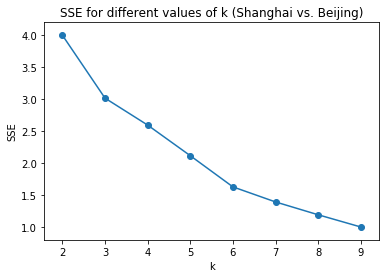

In [95]:
import matplotlib.pyplot as plt
plt.plot(range(2,10),score[2:10])
plt.scatter(range(2,10),score[2:10])
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('SSE for different values of k (Shanghai vs. Beijing)')
plt.show()

### I decided to choose K = 6, because it is an elbow and it is reasonalbe to have 6 clusters. 

In [96]:
# set number of clusters
kclusters = 6
two_city_grouped_clustering = two_city_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(two_city_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 2, 2, 5, 2, 2, 0, 2, 1, 2, 2, 4, 0, 1, 1, 3, 1, 1, 2, 2, 1],
      dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [97]:
# add clustering labels
District_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

two_city_merged = two_city

# merge Beijing_grouped with Beijing_data (df) to add latitude/longitude for each neighborhood
two_city_merged = two_city_merged.join(District_venues_sorted.set_index('District'), on='District')

two_city_merged.head() # check the last columns!

,Postal Code,City,District,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,110100,Beijing,Beijing,116.395645,39.929986,1,Hostel,Hotel,Hotpot Restaurant,Metro Station,French Restaurant,Chinese Restaurant,Restaurant,Café,Scandinavian Restaurant,Bus Station
1,110101,Beijing,Dongcheng,116.421885,39.938574,2,Coffee Shop,Russian Restaurant,Hotel,Vegetarian / Vegan Restaurant,Chinese Restaurant,Japanese Restaurant,Sandwich Place,Cocktail Bar,New American Restaurant,Cantonese Restaurant
2,110102,Beijing,Xicheng,116.373190,39.934280,1,Hotel,Beer Bar,Noodle House,Museum,Mexican Restaurant,Beijing Restaurant,Department Store,Furniture / Home Store,Grocery Store,Gym
3,110103,Beijing,Chongwen,116.424636,39.889292,2,Metro Station,Supermarket,Chinese Restaurant,Fast Food Restaurant,Convenience Store,Gym,Grocery Store,Gym / Fitness Center,Furniture / Home Store,French Restaurant
4,110104,Beijing,Xuanwu,116.369352,39.891531,1,Hotel,Fast Food Restaurant,Department Store,Sandwich Place,Coffee Shop,Metro Station,Shopping Mall,Furniture / Home Store,French Restaurant,Grocery Store


In [98]:
print(two_city_merged.shape)
two_city_merged

(21, 16)


,Postal Code,City,District,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,110100,Beijing,Beijing,116.395645,39.929986,1,Hostel,Hotel,Hotpot Restaurant,Metro Station,French Restaurant,Chinese Restaurant,Restaurant,Café,Scandinavian Restaurant,Bus Station
1,110101,Beijing,Dongcheng,116.421885,39.938574,2,Coffee Shop,Russian Restaurant,Hotel,Vegetarian / Vegan Restaurant,Chinese Restaurant,Japanese Restaurant,Sandwich Place,Cocktail Bar,New American Restaurant,Cantonese Restaurant
2,110102,Beijing,Xicheng,116.373190,39.934280,1,Hotel,Beer Bar,Noodle House,Museum,Mexican Restaurant,Beijing Restaurant,Department Store,Furniture / Home Store,Grocery Store,Gym
3,110103,Beijing,Chongwen,116.424636,39.889292,2,Metro Station,Supermarket,Chinese Restaurant,Fast Food Restaurant,Convenience Store,Gym,Grocery Store,Gym / Fitness Center,Furniture / Home Store,French Restaurant
4,110104,Beijing,Xuanwu,116.369352,39.891531,1,Hotel,Fast Food Restaurant,Department Store,Sandwich Place,Coffee Shop,Metro Station,Shopping Mall,Furniture / Home Store,French Restaurant,Grocery Store
5,110105,Beijing,Chaoyang,116.521695,39.958953,5,Park,Auto Garage,Wedding Hall,Farmers Market,Department Store,Dessert Shop,Dim Sum Restaurant,Dongbei Restaurant,Dumpling Restaurant,Electronics Store
6,110108,Beijing,Haidian,116.239678,40.033162,0,Chinese Restaurant,Wedding Hall,Comedy Club,Department Store,Dessert Shop,Dim Sum Restaurant,Dongbei Restaurant,Dumpling Restaurant,Electronics Store,Farmers Market
7,110114,Beijing,Changping,116.216456,40.221724,2,Shopping Mall,Asian Restaurant,Chinese Restaurant,Bakery,Korean Restaurant,Fast Food Restaurant,Dessert Shop,Dim Sum Restaurant,Dongbei Restaurant,Dumpling Restaurant
0,310100,Shanghai,Shanghai,121.487899,31.249162,1,Hotel,Hotel Bar,Coffee Shop,Restaurant,Convenience Store,Lounge,Café,Breakfast Spot,Shanghai Restaurant,French Restaurant
1,310101,Shanghai,Huangpu,121.496072,31.227203,1,Clothing Store,Hotel,Hotel Bar,Shanghai Restaurant,Business Center,Café,Coffee Shop,Furniture / Home Store,New American Restaurant,Scenic Lookout


Finally, let's visualize the resulting clusters

In [100]:
# create map
two_city_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(two_city_merged['Latitude'], two_city_merged['Longitude'], two_city_merged['District'], two_city_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(two_city_map_clusters)
       
two_city_map_clusters

## STEP 4. Examine Clusters
Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. 

In [101]:
# Cluster 1
two_city_merged.loc[two_city_merged['Cluster Labels'] == 0, two_city_merged.columns[[1] + [2] + list(range(5, two_city_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Beijing,Haidian,0,Chinese Restaurant,Wedding Hall,Comedy Club,Department Store,Dessert Shop,Dim Sum Restaurant,Dongbei Restaurant,Dumpling Restaurant,Electronics Store,Farmers Market
12,Shanghai,Nanhui,0,Chinese Restaurant,Wedding Hall,Comedy Club,Department Store,Dessert Shop,Dim Sum Restaurant,Dongbei Restaurant,Dumpling Restaurant,Electronics Store,Farmers Market


In [102]:
# Cluster 2
two_city_merged.loc[two_city_merged['Cluster Labels'] == 1, two_city_merged.columns[[1] + [2] + list(range(5, two_city_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beijing,Beijing,1,Hostel,Hotel,Hotpot Restaurant,Metro Station,French Restaurant,Chinese Restaurant,Restaurant,Café,Scandinavian Restaurant,Bus Station
2,Beijing,Xicheng,1,Hotel,Beer Bar,Noodle House,Museum,Mexican Restaurant,Beijing Restaurant,Department Store,Furniture / Home Store,Grocery Store,Gym
4,Beijing,Xuanwu,1,Hotel,Fast Food Restaurant,Department Store,Sandwich Place,Coffee Shop,Metro Station,Shopping Mall,Furniture / Home Store,French Restaurant,Grocery Store
0,Shanghai,Shanghai,1,Hotel,Hotel Bar,Coffee Shop,Restaurant,Convenience Store,Lounge,Café,Breakfast Spot,Shanghai Restaurant,French Restaurant
1,Shanghai,Huangpu,1,Clothing Store,Hotel,Hotel Bar,Shanghai Restaurant,Business Center,Café,Coffee Shop,Furniture / Home Store,New American Restaurant,Scenic Lookout
5,Shanghai,Putuo,1,Hotel,Train Station,Metro Station,History Museum,Gym Pool,Convenience Store,Department Store,Dessert Shop,Dim Sum Restaurant,Dongbei Restaurant
6,Shanghai,Zhabei,1,Hotel,Asian Restaurant,Massage Studio,Seafood Restaurant,Wedding Hall,Farmers Market,Department Store,Dessert Shop,Dim Sum Restaurant,Dongbei Restaurant


In [103]:
# Cluster 3
two_city_merged.loc[two_city_merged['Cluster Labels'] == 2, two_city_merged.columns[[1] + [2] + list(range(5, two_city_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Beijing,Dongcheng,2,Coffee Shop,Russian Restaurant,Hotel,Vegetarian / Vegan Restaurant,Chinese Restaurant,Japanese Restaurant,Sandwich Place,Cocktail Bar,New American Restaurant,Cantonese Restaurant
3,Beijing,Chongwen,2,Metro Station,Supermarket,Chinese Restaurant,Fast Food Restaurant,Convenience Store,Gym,Grocery Store,Gym / Fitness Center,Furniture / Home Store,French Restaurant
7,Beijing,Changping,2,Shopping Mall,Asian Restaurant,Chinese Restaurant,Bakery,Korean Restaurant,Fast Food Restaurant,Dessert Shop,Dim Sum Restaurant,Dongbei Restaurant,Dumpling Restaurant
2,Shanghai,Xuhui,2,Wedding Hall,Chinese Restaurant,Gym / Fitness Center,Sushi Restaurant,Café,Comedy Club,Electronics Store,Department Store,Dessert Shop,Dim Sum Restaurant
3,Shanghai,Changning,2,Chinese Restaurant,Japanese Restaurant,Hotel,Gym Pool,Athletics & Sports,Tea Room,Movie Theater,Art Museum,Ramen Restaurant,Dongbei Restaurant
4,Shanghai,Jingan,2,Coffee Shop,Hotel,Convenience Store,Chinese Restaurant,Hotel Bar,Café,History Museum,Vegetarian / Vegan Restaurant,French Restaurant,Hotpot Restaurant
7,Shanghai,Hongkou,2,Ramen Restaurant,Bakery,Convenience Store,Chinese Restaurant,Café,Pool,Gym,Grocery Store,Furniture / Home Store,French Restaurant
8,Shanghai,Yangpu,2,Fast Food Restaurant,Bus Station,Chinese Restaurant,Convenience Store,Gym Pool,History Museum,Department Store,Dessert Shop,Hostel,Dim Sum Restaurant
10,Shanghai,Jiading,2,Spa,Chinese Restaurant,Noodle House,Dumpling Restaurant,Farmers Market,Department Store,Dessert Shop,Dim Sum Restaurant,Dongbei Restaurant,Electronics Store


In [104]:
# Cluster 4
two_city_merged.loc[two_city_merged['Cluster Labels'] == 3, two_city_merged.columns[[1] + [2] + list(range(5, two_city_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Shanghai,Songjiang,3,Metro Station,Toll Booth,Fast Food Restaurant,Convenience Store,Department Store,Dessert Shop,Dim Sum Restaurant,Dongbei Restaurant,Dumpling Restaurant,Electronics Store


In [105]:
# Cluster 5
two_city_merged.loc[two_city_merged['Cluster Labels'] == 4, two_city_merged.columns[[1] + [2] + list(range(5, two_city_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Shanghai,Minhang,4,Residential Building (Apartment / Condo),Coffee Shop,Comedy Club,Convenience Store,Department Store,Dessert Shop,Dim Sum Restaurant,Dongbei Restaurant,Dumpling Restaurant,Electronics Store


In [106]:
# Cluster 6
two_city_merged.loc[two_city_merged['Cluster Labels'] == 5, two_city_merged.columns[[1] + [2] + list(range(5, two_city_merged.shape[1]))]]

,City,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Beijing,Chaoyang,5,Park,Auto Garage,Wedding Hall,Farmers Market,Department Store,Dessert Shop,Dim Sum Restaurant,Dongbei Restaurant,Dumpling Restaurant,Electronics Store


# Now I arrived at the final point, which partitioned 21 districts from both Shanghai and Beijing into 6 clusters: 

**CLUSTER 1**: 2 districts. Haidian (Beijing) and Nanhui (Shanghai) were partitioned as a cluster. Since the top 2 universities of China, Qinghua University and Peking University, are located in Haidian (Beijing), and there are plenty of universities located in Nanhui (Shanghai), I would like to name CLUSTER 1 as “**College Town**”. 

**CLUSTER 2**: 7 districts. Districts Beijing (downtown), Xicheng and Xuanwu from Beijing, and Shanghai (downtown), Huangpu, Putuo, Zhabei from Shanghai, were partitioned as the same cluster. When I check them on map, I realized that those 7 districts are almost all located at the very center of the two cities, I would like to name CLUSTER 2 as “**Traditional Cosmopolitan Area**”.

**CLUSTER 3**: 9 districts. Districts Dongcheng, Chongwen and Changping from Bejing, Xuhui, Changning, Jingan, Hongkou, Yangpu and Jiading from Shanghai, were partitioned as the same cluster. When I check them on map, I realized that those 9 districts are almost all located at the very center of the two cities, except Changping (Beijing) and Jiangding (Shanghai) are located far away from the centers of the two cities. I think those two exception is reasonable since urban expansion was one of the main topics during the past 2 decades in Chinese metropolis development. Therefore, I would like to name CLUSTER 3 as “**Newly Developed Cosmopolitan Area**”.

**CLUSTER 4**: 1 district. Minhang (from Shanghai) was partitioned as a cluster itself. I would like to name CLUSTER 4 as “**Minhang High-tech Development Zone**”.

**CLUSTER 5**: 1 district. Chaoyang (from Beijing) was partitioned as a cluster itself. I would like to name CLUSTER 5 as “**Densely Populated Area**”.

**CLUSTER 6**: 1 district. Songjiang (from Shanghai) was partitioned as a cluster itself. I would like to name CLUSTER 6 as “**Old Shanghai**” since in here live a lot of original residents of Shanghai. 